In [134]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

from sklearn import preprocessing

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [135]:
df_tNonGeo = pd.read_csv('NYC_Bgrp_Geocoded_Cleaned_Features_Only.csv')

In [136]:
df_tNonGeo

,Unnamed: 0,MFor_P,Green_P,MFor_PC,Green_PC,core_m,asthma,bgpopdense,phys_hlth,child_perc,...,avg_temp,pctpoc,seniorperc,unemplrate,dep_ratio,pctpov,medhhinc,core_norm,over_70pct,NonWt_Pct
0,0,13.420000,14.820000,268.99,297.20,26.0,7.0,8064.946857,4.9,0.089772,...,77.747253,0.346578,0.005887,0.055649,0.105777,0.111111,136417.0,0.720682,7.14286,63.095238
1,1,9.720000,14.740000,7.09,10.74,20.7,7.0,14776.720665,10.4,0.229698,...,81.781481,0.936195,0.068445,0.056122,0.424793,0.375874,48563.0,0.572328,8.45423,89.094547
2,2,17.070000,26.690001,10.02,15.67,20.7,7.0,14082.462253,10.4,0.157646,...,81.132022,0.945876,0.094931,0.076271,0.337931,0.313574,67545.0,0.572328,6.66432,90.021157
3,3,16.850000,24.959999,8.77,12.98,20.7,7.0,15212.443934,10.6,0.132171,...,77.206863,0.952070,0.157589,0.009923,0.407975,0.309848,52586.0,0.558400,6.49799,92.926970
4,4,17.629999,27.040001,6.54,10.03,20.7,7.0,28017.133619,10.6,0.197501,...,76.970149,0.919096,0.165378,0.039117,0.569561,0.353480,57237.0,0.558400,10.45790,89.480198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,6207,35.709999,51.549999,9.39,13.55,12.3,14.9,30951.822658,19.6,0.314685,...,80.209677,1.000000,0.113636,0.218688,0.749235,0.908508,13458.0,0.351705,6.11954,99.098672
6208,6208,27.540001,46.590000,5.26,8.90,12.3,14.9,45048.082041,19.6,0.356440,...,79.588710,1.000000,0.071288,0.168375,0.747419,0.813312,15281.0,0.351705,5.49712,99.049881
6209,6209,38.310001,50.139999,6.52,8.53,13.8,15.9,59029.192125,24.0,0.270270,...,74.595960,1.000000,0.057504,0.560501,0.487596,0.878666,21094.0,0.385730,5.89595,99.364162
6210,6210,22.450001,37.369999,3.95,6.58,13.8,15.9,87326.607818,24.0,0.377951,...,74.963768,0.993335,0.026659,0.069721,0.679571,0.855499,16354.0,0.385730,4.44065,99.359522


In [137]:
df_tNonGeo = df_tNonGeo.drop(columns='Unnamed: 0')

In [138]:
df_tNonGeo.columns

Index(['MFor_P', 'Green_P', 'MFor_PC', 'Green_PC', 'core_m', 'asthma',
       'bgpopdense', 'phys_hlth', 'child_perc', 'core_w', 'avg_temp', 'pctpoc',
       'seniorperc', 'unemplrate', 'dep_ratio', 'pctpov', 'medhhinc',
       'core_norm', 'over_70pct', 'NonWt_Pct'],
      dtype='object')

In [139]:
df_tNonGeo.rename(columns={"MFor_P": "TreeCoverPercentage", "Green_P": "GreenSpacePercentage","MFor_PC": "TreeCoverPercentagePerCaptita","Green_PC": "GreenSpacePercentagePerCaptita","core_m":"CoronaryDiseaseInMale",
"asthma":"PopulationWithAsthma","bgpopdense":"PopulationDensityInThisBloackGroup","phys_hlth":"PopulationWithPhysicalHealthProblems","child_perc":"PercentageOfChildren","core_w":"CoronaryDiseaseInFemale",'avg_temp':'AverageTempOnASummersDay',
'pctpoc':'PeopleOfColorPercentange','seniorperc':'PercentageOfSenior','unemplrate':'UnemploymentRate','dep_ratio':'RatioOfDependents','pctpov':'PovertyPopulationPercentange','medhhinc':'MedianHouseholdIncome','core_norm':'CoronaryDiseaseNormalized',
"over_70pct":"AgeOver70Percentage","NonWt_Pct":"NonWhitePopulationPercentage"}, inplace=True) 
df_tNonGeo

,TreeCoverPercentage,GreenSpacePercentage,TreeCoverPercentagePerCaptita,GreenSpacePercentagePerCaptita,CoronaryDiseaseInMale,PopulationWithAsthma,PopulationDensityInThisBloackGroup,PopulationWithPhysicalHealthProblems,PercentageOfChildren,CoronaryDiseaseInFemale,AverageTempOnASummersDay,PeopleOfColorPercentange,PercentageOfSenior,UnemploymentRate,RatioOfDependents,PovertyPopulationPercentange,MedianHouseholdIncome,CoronaryDiseaseNormalized,AgeOver70Percentage,NonWhitePopulationPercentage
0,13.420000,14.820000,268.99,297.20,26.0,7.0,8064.946857,4.9,0.089772,25.0,77.747253,0.346578,0.005887,0.055649,0.105777,0.111111,136417.0,0.720682,7.14286,63.095238
1,9.720000,14.740000,7.09,10.74,20.7,7.0,14776.720665,10.4,0.229698,19.8,81.781481,0.936195,0.068445,0.056122,0.424793,0.375874,48563.0,0.572328,8.45423,89.094547
2,17.070000,26.690001,10.02,15.67,20.7,7.0,14082.462253,10.4,0.157646,19.8,81.132022,0.945876,0.094931,0.076271,0.337931,0.313574,67545.0,0.572328,6.66432,90.021157
3,16.850000,24.959999,8.77,12.98,20.7,7.0,15212.443934,10.6,0.132171,18.8,77.206863,0.952070,0.157589,0.009923,0.407975,0.309848,52586.0,0.558400,6.49799,92.926970
4,17.629999,27.040001,6.54,10.03,20.7,7.0,28017.133619,10.6,0.197501,18.8,76.970149,0.919096,0.165378,0.039117,0.569561,0.353480,57237.0,0.558400,10.45790,89.480198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,35.709999,51.549999,9.39,13.55,12.3,14.9,30951.822658,19.6,0.314685,12.6,80.209677,1.000000,0.113636,0.218688,0.749235,0.908508,13458.0,0.351705,6.11954,99.098672
6208,27.540001,46.590000,5.26,8.90,12.3,14.9,45048.082041,19.6,0.356440,12.6,79.588710,1.000000,0.071288,0.168375,0.747419,0.813312,15281.0,0.351705,5.49712,99.049881
6209,38.310001,50.139999,6.52,8.53,13.8,15.9,59029.192125,24.0,0.270270,13.5,74.595960,1.000000,0.057504,0.560501,0.487596,0.878666,21094.0,0.385730,5.89595,99.364162
6210,22.450001,37.369999,3.95,6.58,13.8,15.9,87326.607818,24.0,0.377951,13.5,74.963768,0.993335,0.026659,0.069721,0.679571,0.855499,16354.0,0.385730,4.44065,99.359522


In [140]:
df_tNonGeo.drop(columns=['TreeCoverPercentagePerCaptita','GreenSpacePercentagePerCaptita'],inplace=True)

In [141]:
columns = df_tNonGeo.columns
#scaling the dataset
scalerData = preprocessing.StandardScaler().fit(df_tNonGeo)
dataS = scalerData.transform(df_tNonGeo)

#add original column names to the dataset to get the full scaled dataset 
dataScaled = pd.DataFrame(dataS, columns=columns)

In [142]:
class Factor_pre_test:
    def __init__(self, df):
        self.df = df
    
    def update_df(self, new_df):
        self.df = new_df
    def bartletts(self):
        chi_square_value, p_value = calculate_bartlett_sphericity(self.df)
        print('The p_value is {}'.format(p_value))
    def kmo(self):
        kmo_all,kmo_model=calculate_kmo(self.df)
        print('The kmo is {}'.format(kmo_model))
    def eigenval_plot(self):
        faa = FactorAnalyzer(25,rotation=None)
        faa.fit(self.df)
        ev,v=faa.get_eigenvalues()
        plt.scatter(range(1, self.df.shape[1] + 1), ev)
        plt.plot(range(1, self.df.shape[1] + 1), ev)
        plt.title("Scree Plot")  
        plt.xlabel("Factors")
        plt.ylabel("Eigenvalue")
        plt.grid()
        plt.show()

In [143]:
def rotate(df, n):
    faa_two = FactorAnalyzer(n,rotation='varimax')
    return faa_two.fit(df)

In [144]:
class Factor_analysis:
    def __init__(self, fact, df):
        self.fact = fact
        self.df = df
    
    def update_df(self):
        self.fact = new_fact
        self.df = new_df
    def show_explained_variance(self):
        return pd.DataFrame(self.fact.get_communalities(),index=self.df.columns)
    def show_factor_component(self):
        return pd.DataFrame(self.fact.loadings_,index=self.df.columns)
    def show_variance_feature(self):
        return pd.DataFrame(np.abs(self.fact.loadings_),index=self.df.columns)

In [145]:
def plot_variance_feature(df, fact):
        plt.figure(figsize = (14,14))
        ax = sns.heatmap(df, annot=True, cmap="BuPu")
        ax.yaxis.set_tick_params(labelsize=15)
        plt.title("Factor Analysis", fontsize="xx-large")
        plt.ylabel("Sepal Width", fontsize="xx-large")
        plt.show()

def transform(df, fact):
    return pd.DataFrame(fact.transform(df))

/opt/homebrew/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


The p_value is nan
The kmo is 0.7747374236396186


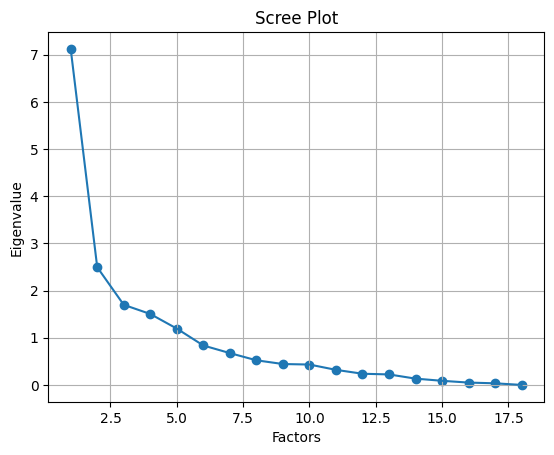

In [146]:
test = Factor_pre_test(df_tNonGeo)
test.bartletts()

test.kmo()
test.eigenval_plot()

Factor 0 explained 0.3698813666504212 of the total variance
Factor 1 explained 0.10686755310393524 of the total variance
Factor 2 explained 0.10462157398649054 of the total variance
Factor 3 explained 0.06277955910112928 of the total variance
All Factor accumulated explained [0.64415005] of the total variance


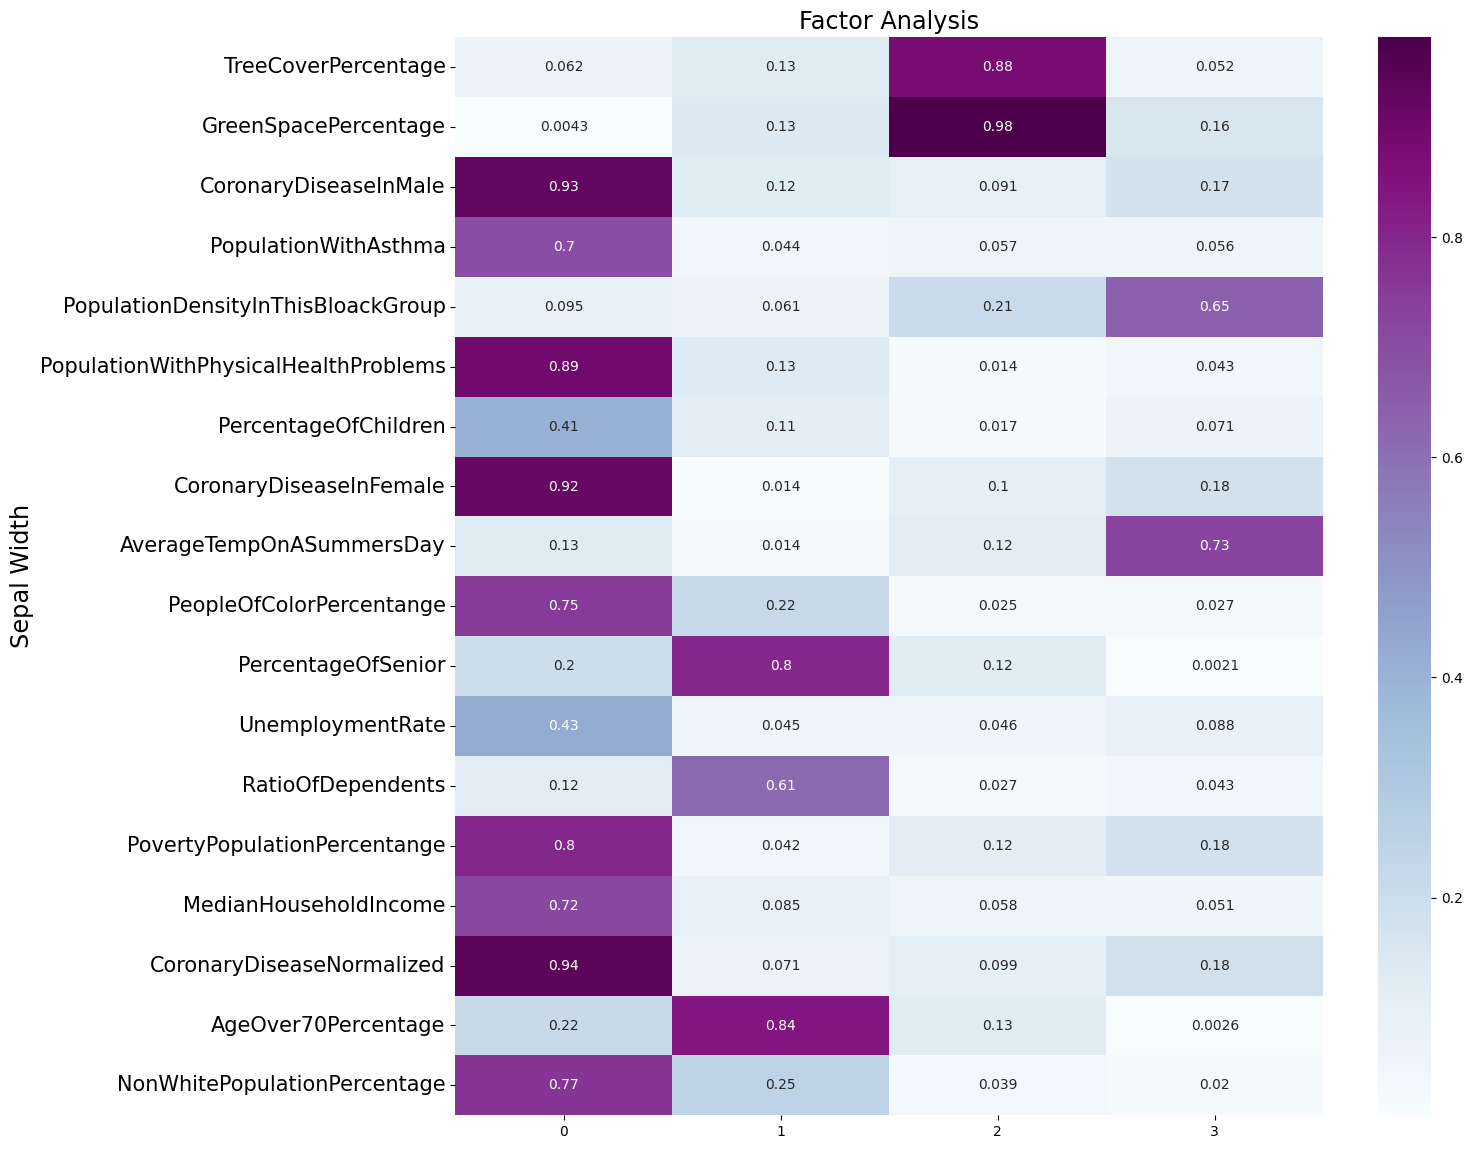

In [147]:
#choose 5 - this is a personal preference, could vary from 3, 4, 5... etc as long as it's less than 20
num_factors = 4
dfr = rotate(df_tNonGeo,num_factors)
for i in range(len(dfr.get_factor_variance()[1])):
    print('Factor {} explained {} of the total variance'.format(i, dfr.get_factor_variance()[1][i]))

print('All Factor accumulated explained {} of the total variance'.format(dfr.get_factor_variance()[2][-1:]))

analysis = Factor_analysis(dfr,df_tNonGeo)

analysis.show_explained_variance()
analysis.show_factor_component()
df_feature = analysis.show_variance_feature()
plot_variance_feature(df_feature, dfr)
df_trans = transform(df_tNonGeo, dfr)


In [148]:
df_tNonGeo

,TreeCoverPercentage,GreenSpacePercentage,CoronaryDiseaseInMale,PopulationWithAsthma,PopulationDensityInThisBloackGroup,PopulationWithPhysicalHealthProblems,PercentageOfChildren,CoronaryDiseaseInFemale,AverageTempOnASummersDay,PeopleOfColorPercentange,PercentageOfSenior,UnemploymentRate,RatioOfDependents,PovertyPopulationPercentange,MedianHouseholdIncome,CoronaryDiseaseNormalized,AgeOver70Percentage,NonWhitePopulationPercentage
0,13.420000,14.820000,26.0,7.0,8064.946857,4.9,0.089772,25.0,77.747253,0.346578,0.005887,0.055649,0.105777,0.111111,136417.0,0.720682,7.14286,63.095238
1,9.720000,14.740000,20.7,7.0,14776.720665,10.4,0.229698,19.8,81.781481,0.936195,0.068445,0.056122,0.424793,0.375874,48563.0,0.572328,8.45423,89.094547
2,17.070000,26.690001,20.7,7.0,14082.462253,10.4,0.157646,19.8,81.132022,0.945876,0.094931,0.076271,0.337931,0.313574,67545.0,0.572328,6.66432,90.021157
3,16.850000,24.959999,20.7,7.0,15212.443934,10.6,0.132171,18.8,77.206863,0.952070,0.157589,0.009923,0.407975,0.309848,52586.0,0.558400,6.49799,92.926970
4,17.629999,27.040001,20.7,7.0,28017.133619,10.6,0.197501,18.8,76.970149,0.919096,0.165378,0.039117,0.569561,0.353480,57237.0,0.558400,10.45790,89.480198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,35.709999,51.549999,12.3,14.9,30951.822658,19.6,0.314685,12.6,80.209677,1.000000,0.113636,0.218688,0.749235,0.908508,13458.0,0.351705,6.11954,99.098672
6208,27.540001,46.590000,12.3,14.9,45048.082041,19.6,0.356440,12.6,79.588710,1.000000,0.071288,0.168375,0.747419,0.813312,15281.0,0.351705,5.49712,99.049881
6209,38.310001,50.139999,13.8,15.9,59029.192125,24.0,0.270270,13.5,74.595960,1.000000,0.057504,0.560501,0.487596,0.878666,21094.0,0.385730,5.89595,99.364162
6210,22.450001,37.369999,13.8,15.9,87326.607818,24.0,0.377951,13.5,74.963768,0.993335,0.026659,0.069721,0.679571,0.855499,16354.0,0.385730,4.44065,99.359522


In [149]:
#transform the data for cluster
df_trans = transform(df_tNonGeo, dfr)
df_trans

,0,1,2,3
0,-1.562463,-1.270416,-0.516304,-0.151576
1,-0.145558,-0.468424,-0.819540,-0.753417
2,-0.129652,-0.707993,0.110804,-0.773221
3,-0.011189,-0.399061,0.035629,-0.226537
4,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...
6207,2.234482,-0.004125,1.936743,0.019021
6208,2.156830,-0.216920,1.648439,0.069379
6209,2.579649,-0.322778,2.220633,2.072531
6210,2.323282,-0.321652,1.307777,2.013521


In [150]:
dfGeoMent = pd.read_csv('NYC_Bgrp_Geocoded_Cleaned_Feb22.csv',)

In [151]:
dfGeoMent = dfGeoMent.dropna() #drop empty cells to get the same number of rows
dfGeoMent.reset_index(inplace=True, drop=True)
dfGeoMent

,bgrp,SUM_POP10,MFor_P,Green_P,MFor_PC,Green_PC,Shape_Area,geometry,core_m,asthma,...,pctpoc,seniorperc,unemplrate,dep_ratio,pctpov,ment_hlth,medhhinc,core_norm,over_70pct,NonWt_Pct
0,360470011001,84,13.420000,14.820000,268.99,297.20,168511.127116,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",26.0,7.0,...,0.346578,0.005887,0.055649,0.105777,0.111111,7.4,136417,0.720682,7.14286,63.095238
1,360810475001,1999,9.720000,14.740000,7.09,10.74,145823.685696,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",20.7,7.0,...,0.936195,0.068445,0.056122,0.424793,0.375874,9.9,48563,0.572328,8.45423,89.094547
2,360810475002,2836,17.070000,26.690001,10.02,15.67,166575.485599,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",20.7,7.0,...,0.945876,0.094931,0.076271,0.337931,0.313574,9.9,67545,0.572328,6.66432,90.021157
3,360810457001,1739,16.850000,24.959999,8.77,12.98,90517.283561,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",20.7,7.0,...,0.952070,0.157589,0.009923,0.407975,0.309848,10.0,52586,0.558400,6.49799,92.926970
4,360810457002,1616,17.629999,27.040001,6.54,10.03,59999.759468,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",20.7,7.0,...,0.919096,0.165378,0.039117,0.569561,0.353480,10.0,57237,0.558400,10.45790,89.480198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,360470912002,2108,35.709999,51.549999,9.39,13.55,55440.687640,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",12.3,14.9,...,1.000000,0.113636,0.218688,0.749235,0.908508,20.8,13458,0.351705,6.11954,99.098672
6208,360470912003,2947,27.540001,46.590000,5.26,8.90,56362.503270,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",12.3,14.9,...,1.000000,0.071288,0.168375,0.747419,0.813312,20.8,15281,0.351705,5.49712,99.049881
6209,360050147013,1730,38.310001,50.139999,6.52,8.53,29459.567680,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",13.8,15.9,...,1.000000,0.057504,0.560501,0.487596,0.878666,22.5,21094,0.385730,5.89595,99.364162
6210,360050147011,2342,22.450001,37.369999,3.95,6.58,41235.864792,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",13.8,15.9,...,0.993335,0.026659,0.069721,0.679571,0.855499,22.5,16354,0.385730,4.44065,99.359522


In [152]:
dfGeoMent = dfGeoMent[['bgrp','geometry','ment_hlth']]
dfGeoMent

,bgrp,geometry,ment_hlth
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0
...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5


In [153]:
df_transGeo = dfGeoMent.merge(df_trans, left_index=True,right_index=True)
df_transGeo

,bgrp,geometry,ment_hlth,0,1,2,3
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4,-1.562463,-1.270416,-0.516304,-0.151576
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9,-0.145558,-0.468424,-0.819540,-0.753417
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9,-0.129652,-0.707993,0.110804,-0.773221
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0,-0.011189,-0.399061,0.035629,-0.226537
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8,2.234482,-0.004125,1.936743,0.019021
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8,2.156830,-0.216920,1.648439,0.069379
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5,2.579649,-0.322778,2.220633,2.072531
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5,2.323282,-0.321652,1.307777,2.013521


In [154]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = km.fit_predict(df_trans)
    #report average Silhouette score
    silhouette_avg = silhouette_score(df_trans, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.22487858441729427
For n_clusters =3, the average silhouette_score is :0.23680202299315686
For n_clusters =4, the average silhouette_score is :0.22738342376543602


In [155]:
df_transGeo

,bgrp,geometry,ment_hlth,0,1,2,3
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4,-1.562463,-1.270416,-0.516304,-0.151576
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9,-0.145558,-0.468424,-0.819540,-0.753417
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9,-0.129652,-0.707993,0.110804,-0.773221
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0,-0.011189,-0.399061,0.035629,-0.226537
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8,2.234482,-0.004125,1.936743,0.019021
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8,2.156830,-0.216920,1.648439,0.069379
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5,2.579649,-0.322778,2.220633,2.072531
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5,2.323282,-0.321652,1.307777,2.013521


In [156]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters, random_state=324)
cluster_labels = km.fit_predict(df_trans)
cluster_labels

array([0, 2, 2, ..., 3, 1, 1], dtype=int32)

In [157]:
#labeling each row with cluster
dfClusteredLabeled=pd.DataFrame({'bgrp':df_transGeo.bgrp, 'ment_health':df_transGeo.ment_hlth, 'label':cluster_labels})
dfClusteredLabeled

,bgrp,ment_health,label
0,360470011001,7.4,0
1,360810475001,9.9,2
2,360810475002,9.9,2
3,360810457001,10.0,2
4,360810457002,10.0,2
...,...,...,...
6207,360470912002,20.8,3
6208,360470912003,20.8,3
6209,360050147013,22.5,3
6210,360050147011,22.5,1


In [158]:
dfClusteredLabeled_group = dfClusteredLabeled.groupby(by=['label'])['bgrp'].count()

In [159]:
dfClusteredLabeled_group

label
0    1159
1    1517
2    2504
3    1032
Name: bgrp, dtype: int64

In [160]:
dfClusteredLabeled

,bgrp,ment_health,label
0,360470011001,7.4,0
1,360810475001,9.9,2
2,360810475002,9.9,2
3,360810457001,10.0,2
4,360810457002,10.0,2
...,...,...,...
6207,360470912002,20.8,3
6208,360470912003,20.8,3
6209,360050147013,22.5,3
6210,360050147011,22.5,1


In [161]:
for i in range(num_clusters):
    col_name = 'label_{}'.format(i)
    dfClusteredLabeled[col_name] = dfClusteredLabeled.label.apply(lambda x : 1 if x==i else 0)

In [162]:
# 每一类项数
dfClusteredLabeled.sum()

bgrp           2.239613e+15
ment_health    8.044940e+04
label          9.621000e+03
label_0        1.159000e+03
label_1        1.517000e+03
label_2        2.504000e+03
label_3        1.032000e+03
dtype: float64

In [163]:
def logistic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', conf_matrix)
    f1 = f1_score(y_test, y_pred)
    print('F1: %.2f' % (f1))
    y_pred_prob = log_reg.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print('ROC AUC Score: %.2f%%' % (roc_auc * 100.0))

In [164]:
for i in range(num_clusters):
    print('cluster', i)
    cluster = 'label_{}'.format(i)
    logistic(df_trans, dfClusteredLabeled[cluster]);print()

cluster 0
Accuracy: 96.30%
Confusion Matrix:
 [[1506   29]
 [  40  289]]
F1: 0.89
ROC AUC Score: 99.34%

cluster 1
Accuracy: 93.08%
Confusion Matrix:
 [[1344   56]
 [  73  391]]
F1: 0.86
ROC AUC Score: 98.20%

cluster 2
Accuracy: 85.89%
Confusion Matrix:
 [[977 136]
 [127 624]]
F1: 0.83
ROC AUC Score: 94.21%

cluster 3
Accuracy: 97.69%
Confusion Matrix:
 [[1528   16]
 [  27  293]]
F1: 0.93
ROC AUC Score: 99.58%



In [190]:
df_trans

,0,1,2,3
0,-1.562463,-1.270416,-0.516304,-0.151576
1,-0.145558,-0.468424,-0.819540,-0.753417
2,-0.129652,-0.707993,0.110804,-0.773221
3,-0.011189,-0.399061,0.035629,-0.226537
4,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...
6207,2.234482,-0.004125,1.936743,0.019021
6208,2.156830,-0.216920,1.648439,0.069379
6209,2.579649,-0.322778,2.220633,2.072531
6210,2.323282,-0.321652,1.307777,2.013521


In [191]:
labeled_df = pd.merge(dfClusteredLabeled, df_trans, left_index=True, right_index=True)

In [192]:
#labeled_df.rename(columns={labeled_df.columns[7]: "Socioeconomic_Status",labeled_df.columns[8]: "Aging",labeled_df.columns[9]: "GreenSpace",labeled_df.columns[10]: "Population_Density"}, inplace = True)
labeled_df

,bgrp,ment_health,label,label_0,label_1,label_2,label_3,0,1,2,3
0,360470011001,7.4,0,1,0,0,0,-1.562463,-1.270416,-0.516304,-0.151576
1,360810475001,9.9,2,0,0,1,0,-0.145558,-0.468424,-0.819540,-0.753417
2,360810475002,9.9,2,0,0,1,0,-0.129652,-0.707993,0.110804,-0.773221
3,360810457001,10.0,2,0,0,1,0,-0.011189,-0.399061,0.035629,-0.226537
4,360810457002,10.0,2,0,0,1,0,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...,...,...,...,...,...,...,...
6207,360470912002,20.8,3,0,0,0,1,2.234482,-0.004125,1.936743,0.019021
6208,360470912003,20.8,3,0,0,0,1,2.156830,-0.216920,1.648439,0.069379
6209,360050147013,22.5,3,0,0,0,1,2.579649,-0.322778,2.220633,2.072531
6210,360050147011,22.5,1,0,1,0,0,2.323282,-0.321652,1.307777,2.013521


In [194]:
def linear_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Train a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Make predictions on testing data
    y_pred = lin_reg.predict(X_test)

    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error: %.2f' % mse)
    print('R-squared: %.2f' % r2)
    print('coefficients: ',lin_reg.coef_)

In [195]:
for i in range(num_clusters):
    print('cluster', i)
    cluster = 'label_{}'.format(i)
    y_0 = labeled_df[labeled_df[cluster]==1]['ment_health']
    x_0 = labeled_df[labeled_df[cluster]==1].iloc[:,-6:]
    linear_reg(x_0, y_0);print()

cluster 0
Mean Squared Error: 0.66
R-squared: 0.60
coefficients:  [ 0.00000000e+00  9.71445147e-17  1.95522372e+00 -2.59097652e-01
 -3.10200541e-01 -9.17828772e-02]

cluster 1
Mean Squared Error: 1.49
R-squared: 0.73
coefficients:  [ 0.00000000e+00  2.22044605e-16  4.02497962e+00 -4.70220935e-01
 -2.74264483e-01  4.08142785e-02]

cluster 2
Mean Squared Error: 2.35
R-squared: 0.57
coefficients:  [ 0.00000000e+00  9.85322934e-16  2.51792710e+00 -1.47811383e-01
 -4.59258263e-01 -1.84313338e-01]

cluster 3
Mean Squared Error: 2.45
R-squared: 0.73
coefficients:  [ 0.          0.          2.75312552 -0.38297598  0.10371196  0.11239034]



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/lib/python3.10

In [196]:
df_c_list = []
#factorDict = ['Socioeconomic_Status','Aging','GreenSpace','Population_Density']
for i in range(num_clusters):
    cluster = 'label_{}'.format(i)
    columns = ['ment_health', cluster]
    columns.extend([i for i in range(num_factors)])
    df_c = labeled_df[labeled_df[cluster]==1][columns]
    df_c_list.append(df_c)

In [197]:
df_c_DF = pd.Series(df_c_list)
df_c_DF

0          ment_health  label_0         0         1...
1          ment_health  label_1         0         1...
2          ment_health  label_2         0         1...
3          ment_health  label_3         0         1...
dtype: object

In [198]:
def describe(i, df_c_list=df_c_list):
    return df_c_list[i].describe()

In [199]:
# NYC均值，用于后续对比
labeled_df['ment_health'].mean()

12.95064391500322

In [207]:
dfClusteredLabeled_group

label
0    1159
1    1517
2    2504
3    1032
Name: bgrp, dtype: int64

In [200]:
# 主要受factor 0 socio economic status影响，ment低
describe(0)

,ment_health,label_0,0,1,2,3
count,1159.000000,1159.0,1159.000000,1159.000000,1159.000000,1159.000000
mean,9.892494,1.0,-1.356627,-0.138152,-0.408671,0.636262
std,1.317926,0.0,0.486679,0.961639,0.604609,0.680313
min,7.000000,1.0,-2.796470,-2.069527,-1.851180,-1.066223
25%,9.000000,1.0,-1.761024,-0.823267,-0.834869,0.158838
50%,9.700000,1.0,-1.418603,-0.331660,-0.473955,0.550102
75%,10.900000,1.0,-0.997336,0.286516,0.029185,1.112841
max,14.300000,1.0,-0.250231,5.108551,1.395797,3.113664


In [201]:
# 主要受factor 0 socio economic status影响 ment高
describe(1)

,ment_health,label_1,0,1,2,3
count,1517.000000,1517.0,1517.000000,1517.000000,1517.000000,1517.000000
mean,15.635399,1.0,0.884048,-0.171831,-0.484658,0.676240
std,2.382543,0.0,0.505902,0.677135,0.561037,0.633995
min,10.000000,1.0,-0.250236,-1.351806,-2.269937,-0.797891
25%,13.900000,1.0,0.529932,-0.559271,-0.897810,0.208791
50%,15.500000,1.0,0.881294,-0.312859,-0.559161,0.580408
75%,17.500000,1.0,1.228259,0.000748,-0.169713,1.058429
max,24.000000,1.0,2.545724,5.658242,1.666521,3.170077


In [202]:
# 主要受factor 3 population density影响 ment略高于平均值
describe(2)

,ment_health,label_2,0,1,2,3
count,2504.000000,2504.0,2504.000000,2504.000000,2504.000000,2504.000000
mean,12.935463,1.0,0.080189,0.081332,-0.224383,-0.681649
std,2.176861,0.0,0.610282,0.957123,0.618071,0.457469
min,8.000000,1.0,-1.689470,-1.871754,-2.482534,-3.305262
25%,11.500000,1.0,-0.347444,-0.463643,-0.699614,-0.996226
50%,12.600000,1.0,0.099963,-0.088024,-0.204231,-0.670744
75%,14.100000,1.0,0.500137,0.401357,0.265027,-0.361331
max,24.000000,1.0,2.397860,14.300290,1.353805,0.423878


In [256]:
describe(3) #受factor 2 green space影响，也略微受aging影响， ment大约是平均值

,ment_health,label_3,0,1,2,3
count,1032.000000,1032.0,1032.000000,1032.000000,1032.000000,1032.000000
mean,12.475484,1.0,-0.024949,0.198061,1.728457,-0.006300
std,3.270147,0.0,1.038272,1.062346,0.759078,0.793171
min,6.200000,1.0,-1.919900,-2.243187,0.435774,-2.249115
25%,10.100000,1.0,-0.801725,-0.384269,1.135086,-0.574687
50%,11.900000,1.0,-0.278836,0.046562,1.560926,-0.125651
75%,14.125000,1.0,0.531912,0.518327,2.179849,0.505876
max,29.800000,1.0,3.968467,10.805131,4.987096,2.525747


In [216]:
labeled_df_labelonly = labeled_df[['label','bgrp']]
labeled_df_labelonly

,label,bgrp
0,0,360470011001
1,2,360810475001
2,2,360810475002
3,2,360810457001
4,2,360810457002
...,...,...
6207,3,360470912002
6208,3,360470912003
6209,3,360050147013
6210,1,360050147011


In [213]:
labeled_df

,bgrp,ment_health,label,label_0,label_1,label_2,label_3,0,1,2,3
0,360470011001,7.4,0,1,0,0,0,-1.562463,-1.270416,-0.516304,-0.151576
1,360810475001,9.9,2,0,0,1,0,-0.145558,-0.468424,-0.819540,-0.753417
2,360810475002,9.9,2,0,0,1,0,-0.129652,-0.707993,0.110804,-0.773221
3,360810457001,10.0,2,0,0,1,0,-0.011189,-0.399061,0.035629,-0.226537
4,360810457002,10.0,2,0,0,1,0,0.054691,0.066749,0.154480,-0.012061
...,...,...,...,...,...,...,...,...,...,...,...
6207,360470912002,20.8,3,0,0,0,1,2.234482,-0.004125,1.936743,0.019021
6208,360470912003,20.8,3,0,0,0,1,2.156830,-0.216920,1.648439,0.069379
6209,360050147013,22.5,3,0,0,0,1,2.579649,-0.322778,2.220633,2.072531
6210,360050147011,22.5,1,0,1,0,0,2.323282,-0.321652,1.307777,2.013521


In [227]:
df_transGeoLabeled = df_transGeo.merge(labeled_df_labelonly,left_index=True,right_index=True)
df_transGeoLabeled

,bgrp_x,geometry,ment_hlth,0,1,2,3,label,bgrp_y
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4,-1.562463,-1.270416,-0.516304,-0.151576,0,360470011001
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9,-0.145558,-0.468424,-0.819540,-0.753417,2,360810475001
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9,-0.129652,-0.707993,0.110804,-0.773221,2,360810475002
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0,-0.011189,-0.399061,0.035629,-0.226537,2,360810457001
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0,0.054691,0.066749,0.154480,-0.012061,2,360810457002
...,...,...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8,2.234482,-0.004125,1.936743,0.019021,3,360470912002
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8,2.156830,-0.216920,1.648439,0.069379,3,360470912003
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5,2.579649,-0.322778,2.220633,2.072531,3,360050147013
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5,2.323282,-0.321652,1.307777,2.013521,1,360050147011


In [228]:
df_transGeoLabeled.drop(columns='bgrp_y',inplace=True)
df_transGeoLabeled

,bgrp_x,geometry,ment_hlth,0,1,2,3,label
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4,-1.562463,-1.270416,-0.516304,-0.151576,0
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9,-0.145558,-0.468424,-0.819540,-0.753417,2
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9,-0.129652,-0.707993,0.110804,-0.773221,2
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0,-0.011189,-0.399061,0.035629,-0.226537,2
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0,0.054691,0.066749,0.154480,-0.012061,2
...,...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8,2.234482,-0.004125,1.936743,0.019021,3
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8,2.156830,-0.216920,1.648439,0.069379,3
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5,2.579649,-0.322778,2.220633,2.072531,3
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5,2.323282,-0.321652,1.307777,2.013521,1


In [229]:
df_transGeoNewLabeled = df_transGeoLabeled.rename(columns={df_transGeoLabeled.columns[3]: "Socioeconomic_Status",df_transGeoLabeled.columns[4]: "Aging",df_transGeoLabeled.columns[5]: "GreenSpace",df_transGeoLabeled.columns[6]: "Population_Density"})
df_transGeoNewLabeled

,bgrp_x,geometry,ment_hlth,Socioeconomic_Status,Aging,GreenSpace,Population_Density,label
0,360470011001,"POLYGON((-73.985241 40.692926, -73.985235 40.6...",7.4,-1.562463,-1.270416,-0.516304,-0.151576,0
1,360810475001,"POLYGON((-73.877838 40.736586, -73.878432 40.7...",9.9,-0.145558,-0.468424,-0.819540,-0.753417,2
2,360810475002,"POLYGON((-73.87507 40.733398, -73.875719 40.73...",9.9,-0.129652,-0.707993,0.110804,-0.773221,2
3,360810457001,"POLYGON((-73.867834 40.736913, -73.866095 40.7...",10.0,-0.011189,-0.399061,0.035629,-0.226537,2
4,360810457002,"POLYGON((-73.870094 40.736522, -73.870407 40.7...",10.0,0.054691,0.066749,0.154480,-0.012061,2
...,...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON((-73.905578 40.664659, -73.905971 40.6...",20.8,2.234482,-0.004125,1.936743,0.019021,3
6208,360470912003,"POLYGON((-73.907032 40.662834, -73.906138 40.6...",20.8,2.156830,-0.216920,1.648439,0.069379,3
6209,360050147013,"POLYGON((-73.905784 40.835724, -73.907085 40.8...",22.5,2.579649,-0.322778,2.220633,2.072531,3
6210,360050147011,"POLYGON((-73.906012 40.835808, -73.907402 40.8...",22.5,2.323282,-0.321652,1.307777,2.013521,1


In [233]:
import geopandas as gpd 

In [237]:
from shapely import wkt

df_transGeoNewLabeled['geometry'] = gpd.GeoSeries.from_wkt(df_transGeoNewLabeled['geometry'])

In [261]:
gdfTransGeoLabeled = gpd.GeoDataFrame(df_transGeoNewLabeled, geometry=df_transGeoNewLabeled['geometry'],crs={'init': 'epsg:4326'})
gdfTransGeoLabeled

/opt/homebrew/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,bgrp_x,geometry,ment_hlth,Socioeconomic_Status,Aging,GreenSpace,Population_Density,label
0,360470011001,"POLYGON ((-73.98524 40.69293, -73.98524 40.693...",7.4,-1.562463,-1.270416,-0.516304,-0.151576,0
1,360810475001,"POLYGON ((-73.87784 40.73659, -73.87843 40.736...",9.9,-0.145558,-0.468424,-0.819540,-0.753417,2
2,360810475002,"POLYGON ((-73.87507 40.73340, -73.87572 40.733...",9.9,-0.129652,-0.707993,0.110804,-0.773221,2
3,360810457001,"POLYGON ((-73.86783 40.73691, -73.86610 40.737...",10.0,-0.011189,-0.399061,0.035629,-0.226537,2
4,360810457002,"POLYGON ((-73.87009 40.73652, -73.87041 40.737...",10.0,0.054691,0.066749,0.154480,-0.012061,2
...,...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON ((-73.90558 40.66466, -73.90597 40.666...",20.8,2.234482,-0.004125,1.936743,0.019021,3
6208,360470912003,"POLYGON ((-73.90703 40.66283, -73.90614 40.662...",20.8,2.156830,-0.216920,1.648439,0.069379,3
6209,360050147013,"POLYGON ((-73.90578 40.83572, -73.90708 40.833...",22.5,2.579649,-0.322778,2.220633,2.072531,3
6210,360050147011,"POLYGON ((-73.90601 40.83581, -73.90740 40.836...",22.5,2.323282,-0.321652,1.307777,2.013521,1


(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

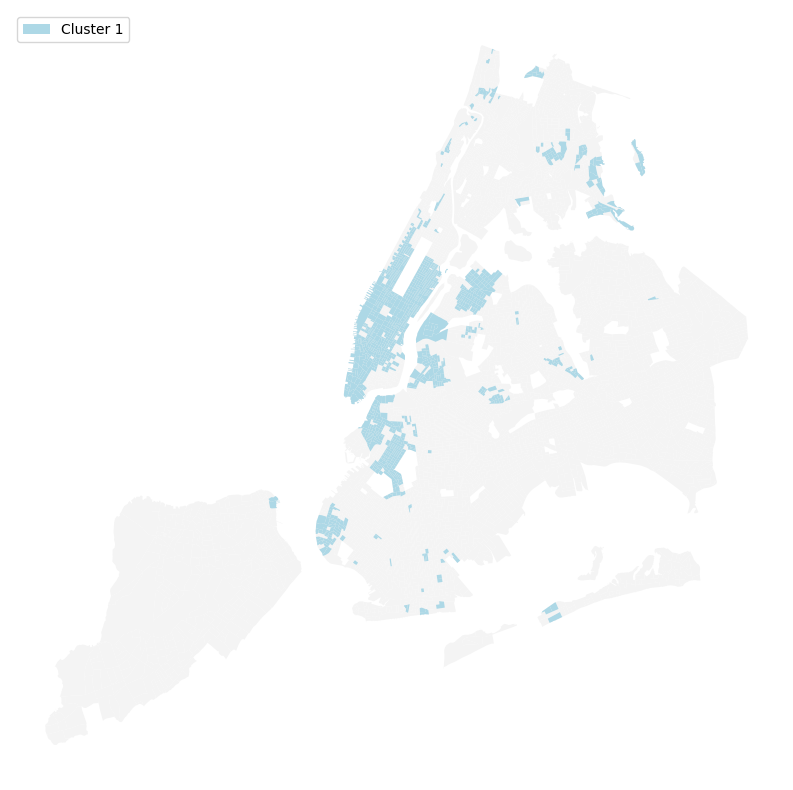

In [262]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize=(10,10))
gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==0)].plot(facecolor='lightblue',ax=ax)
#gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==1)].plot(facecolor='red',ax=ax)
legendElement = [
                 mpatches.Patch(facecolor='lightblue', label='Cluster 1'),
#                 mpatches.Patch(facecolor='red', label='10 Taxi Zones with Lowest Avg Speed'),
               ]
ax.legend(handles = legendElement, loc='upper left')
ax.axis('off')

(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

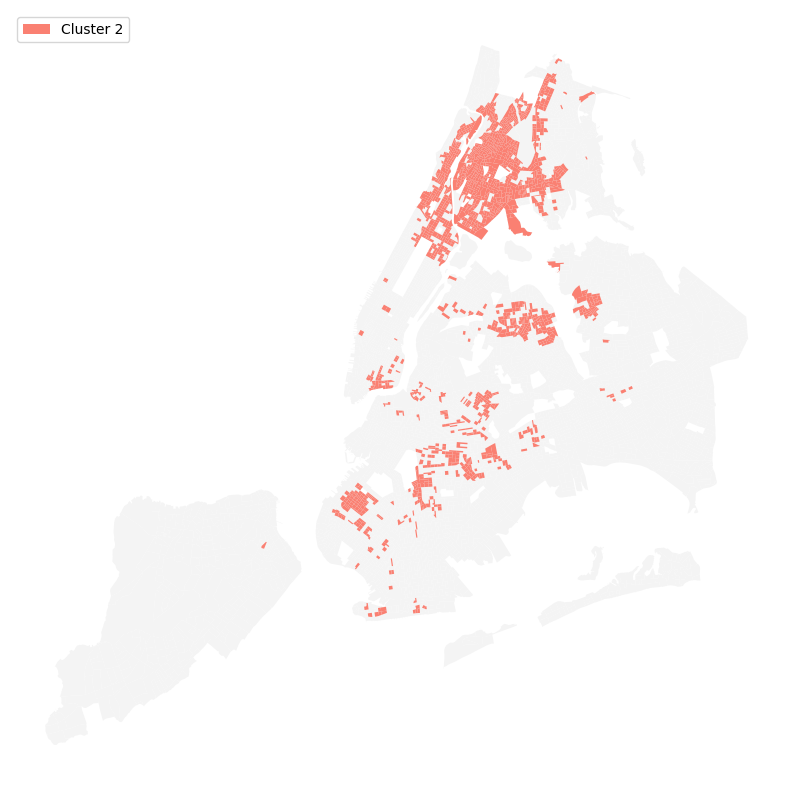

In [268]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==1)].plot(facecolor='salmon',ax=ax)
#gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==1)].plot(facecolor='red',ax=ax)
legendElement = [
                 mpatches.Patch(facecolor='salmon', label='Cluster 2'),
#                 mpatches.Patch(facecolor='red', label='10 Taxi Zones with Lowest Avg Speed'),
               ]
ax.legend(handles = legendElement, loc='upper left')
ax.axis('off')

(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

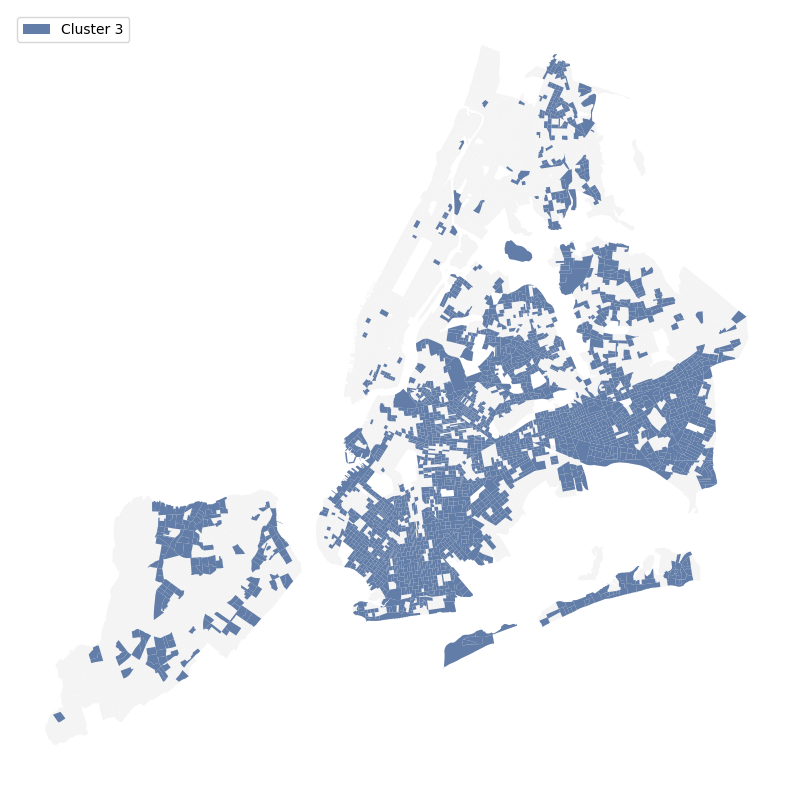

In [270]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==2)].plot(facecolor='#627DA7',ax=ax)
#gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==2)].plot(facecolor='red',ax=ax)
legendElement = [
                 mpatches.Patch(facecolor='#627DA7', label='Cluster 3'),
#                 mpatches.Patch(facecolor='red', label='10 Taxi Zones with Lowest Avg Speed'),
               ]
ax.legend(handles = legendElement, loc='upper left')
ax.axis('off')

(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

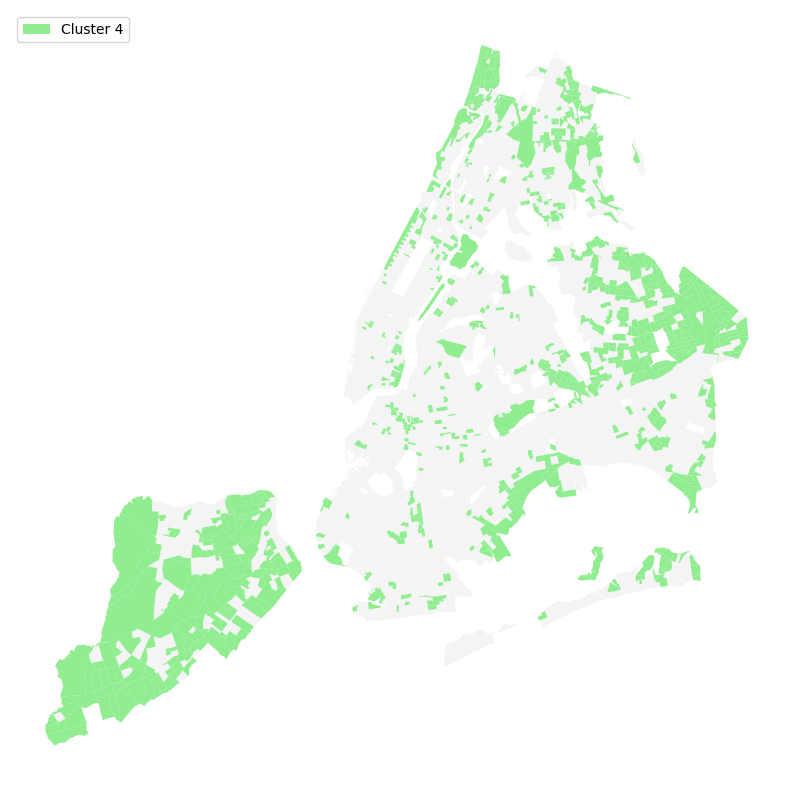

In [265]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==3)].plot(facecolor='lightgreen',ax=ax)
#gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==3)].plot(facecolor='red',ax=ax)
legendElement = [
                 mpatches.Patch(facecolor='lightgreen', label='Cluster 4'),
#                 mpatches.Patch(facecolor='red', label='10 Taxi Zones with Lowest Avg Speed'),
               ]
ax.legend(handles = legendElement, loc='upper left')
ax.axis('off')

In [275]:
gdfTransGeoLabeled = gdfTransGeoLabeled.merge(df_tNonGeo[['GreenSpacePercentage','TreeCoverPercentage']],left_index=True, right_index=True)
gdfTransGeoLabeled

,bgrp_x,geometry,ment_hlth,Socioeconomic_Status,Aging,GreenSpace,Population_Density,label,GreenSpacePercentage,TreeCoverPercentage
0,360470011001,"POLYGON ((-73.98524 40.69293, -73.98524 40.693...",7.4,-1.562463,-1.270416,-0.516304,-0.151576,0,14.820000,13.420000
1,360810475001,"POLYGON ((-73.87784 40.73659, -73.87843 40.736...",9.9,-0.145558,-0.468424,-0.819540,-0.753417,2,14.740000,9.720000
2,360810475002,"POLYGON ((-73.87507 40.73340, -73.87572 40.733...",9.9,-0.129652,-0.707993,0.110804,-0.773221,2,26.690001,17.070000
3,360810457001,"POLYGON ((-73.86783 40.73691, -73.86610 40.737...",10.0,-0.011189,-0.399061,0.035629,-0.226537,2,24.959999,16.850000
4,360810457002,"POLYGON ((-73.87009 40.73652, -73.87041 40.737...",10.0,0.054691,0.066749,0.154480,-0.012061,2,27.040001,17.629999
...,...,...,...,...,...,...,...,...,...,...
6207,360470912002,"POLYGON ((-73.90558 40.66466, -73.90597 40.666...",20.8,2.234482,-0.004125,1.936743,0.019021,3,51.549999,35.709999
6208,360470912003,"POLYGON ((-73.90703 40.66283, -73.90614 40.662...",20.8,2.156830,-0.216920,1.648439,0.069379,3,46.590000,27.540001
6209,360050147013,"POLYGON ((-73.90578 40.83572, -73.90708 40.833...",22.5,2.579649,-0.322778,2.220633,2.072531,3,50.139999,38.310001
6210,360050147011,"POLYGON ((-73.90601 40.83581, -73.90740 40.836...",22.5,2.323282,-0.321652,1.307777,2.013521,1,37.369999,22.450001


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

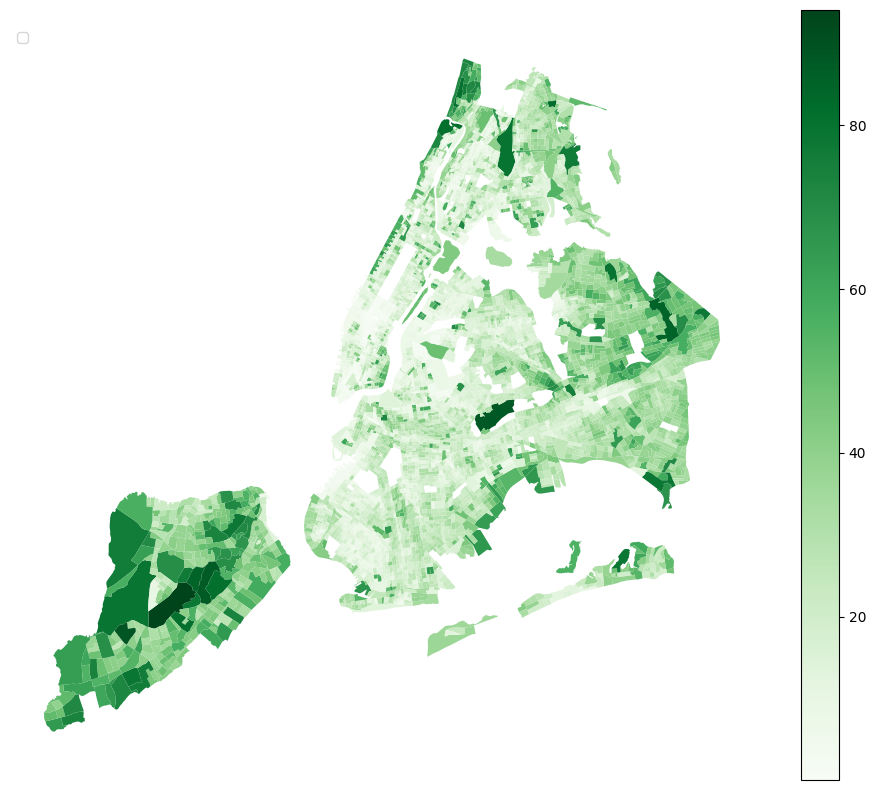

In [287]:
fig, ax = plt.subplots(1, figsize=(12,10))
#gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.plot(column='GreenSpacePercentage',cmap='Greens',ax=ax,legend = True)
#gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==3)].plot(facecolor='red',ax=ax)
ax.legend(loc='upper left')
ax.axis('off')

(-74.2834982, -73.6722238, 40.475082099999995, 40.9362439)

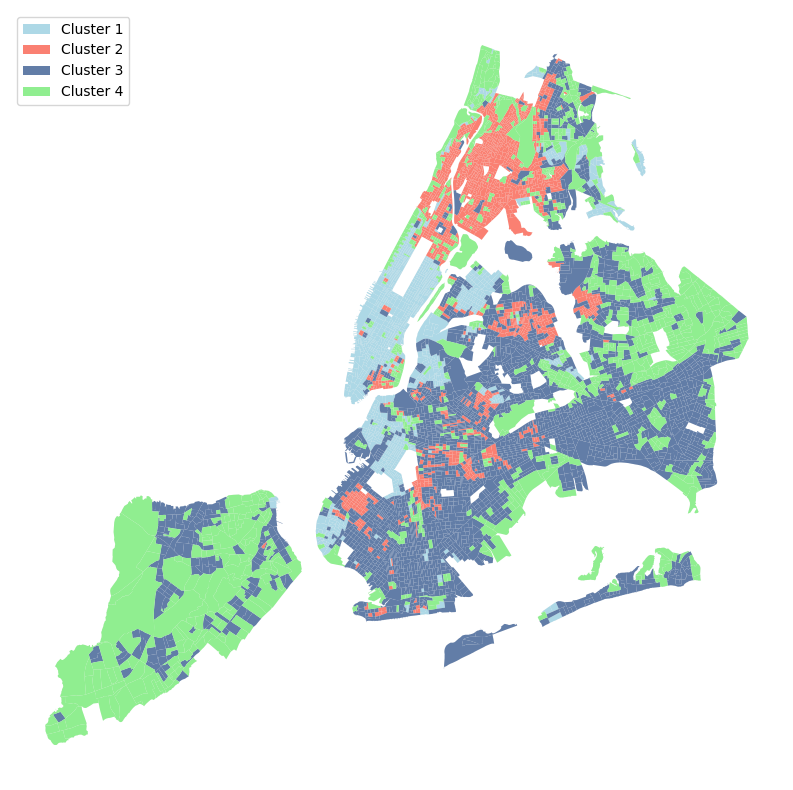

In [272]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdfTransGeoLabeled.plot(facecolor='#F4F4F4',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==0)].plot(facecolor='lightblue',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==1)].plot(facecolor='salmon',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==2)].plot(facecolor='#627DA7',ax=ax)
gdfTransGeoLabeled.loc[(gdfTransGeoLabeled['label']==3)].plot(facecolor='lightgreen',ax=ax)
legendElement = [mpatches.Patch(facecolor='lightblue', label='Cluster 1'), mpatches.Patch(facecolor='salmon', label='Cluster 2'), mpatches.Patch(facecolor='#627DA7', label='Cluster 3'),mpatches.Patch(facecolor='lightgreen', label='Cluster 4')]
ax.legend(handles = legendElement, loc='upper left')
ax.axis('off')